### ** Analyze A/B Test Results**

### Dain Russell, 2020

### Udacity Data Analyst Nanodegree Project 3






## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)






<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these. 

For this project, I worked to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. My goal was to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.


#### Let's get started!
We set up the import statements for all of the packages we plan to use.



In [1]:
# import statements for data analysis and manipulation
import pandas as pd  

# import statement for numerical computations
import numpy as np

import random
import csv 
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 'magic word' so that your visualizations are plotted
%matplotlib inline

# We are setting the seed to assure you get the same answers on quizzes 
# as we set up
random.seed(42)
print("Set up complete")




Set up complete


**1. Let's read in the ab_data.csv data and store it in df.**

**a. Read in the dataset and take a look at the top few rows here:**

In [2]:
# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('ab_data.csv')
# printing first five rows with defined columns of database
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b. Use the below cell to find the number of rows in the dataset.**

We can use the shape attribute to check how the number of rows are in the DataFrame.

In [3]:
# Get the number of rows
print(("There are {} rows in the dataset.".format(df.shape[0])))


There are 294478 rows in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`df.info()` also give the number of rows in our dataframe, 294478 entries. 

**c. The number of unique users in the dataset.**

In [5]:
# counts the unique users in the dataframe
unique_users= df.user_id.nunique()
print("There are" + " " + str(unique_users) + " " + "unique users in the dataset")


There are 290584 unique users in the dataset


**d. The proportion of users converted.**

In [6]:
# proportion of converted users
df['converted'].mean()

0.11965919355605512

0.1197 proportion or about 12.0% of users converted and decided to pay for the company's product

**e. The number of times the new_page and treatment don't match.**

The difference between the shape of the raw data ( 294478 row) and the unique users (290584) also tells the amount of times the new_page and treatment don't match. It also indicates duplicate  values for the user_id.

In [7]:
# count number of rows where (df['landing_page'] == 'new_page')
# does not correspond with (df['group'] == 'treatment')
df[((df['landing_page'] == 'new_page') != (df['group'] == 'treatment')) == True].shape[0]

3893

**f. Do any of the rows have missing values?**

In [8]:
# raw datset summary that displays missing values in each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
# Total up the number of NaN values in each row of the DataFrame.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Awesome! There are no missing values.  

**`2.` For the rows where treatment does not match with new_page or control does not match with old_page, we cannot be sure if this row truly received the new or old page.**

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in df2.

In [10]:
# making copy of dataframe
df2 = df.copy()

# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('ab_data.csv')


# Import into df2 only rows where treatment
# is not aligned with new_page or control is not aligned with old_page
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) |
         ((df.group == 'control') & (df.landing_page == 'old_page'))]

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.**

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
# counts the unique users in the dataset
unique_users= df2.user_id.nunique()
print("There are" + " " + str(unique_users) + " " + "unique users in the dataset")


There are 290584 unique users in the dataset


There are 290585 entries in the new dataframe but 290584 unique users. This means there is a duplicate user.

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# display user_id for duplicate row
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat user_id?

In [15]:
# displaying row information for duplicate user_ids
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
# Get the number of rows in current df2
print(("There are {} rows in the dataset.".format(df2.shape[0])))

There are 290585 rows in the dataset.


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [17]:
# Drop one of the rows that belongs to the repeated user_id

df2 = df2.drop_duplicates(subset='user_id');

In [18]:
# Get the number of rows in df ater dropping duplicate row
print(("There are {} rows in the dataset.".format(df2.shape[0])))

There are 290584 rows in the dataset.


There was only one duplicate row (user) in the new dataframe(df2)

**`4.` Use df2 in the cells below to answer the quiz questions related to Quiz 4 in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?**

In [19]:
# The probability of an individual converting regardless of the page they receive

float(df2.converted.mean())

0.11959708724499628

The probability of an individual converting regardless of the page they receive is 11.96%.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# probability that an individual in control group converted
float(df2.converted[df2.group == 'control'].mean()) 

0.1203863045004612

There is a 0.1204 or 12.04% probability that a user that was in the control group converted.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
#  rounded probability that an individual in treatment group converted
float(df2.converted[df2.group == 'treatment'].mean())

0.11880806551510564

There is a 0.1188  or 11.9% probability that a user that was in the treatment group converted.

d. What is the probability that an individual received the new page?

In [22]:
df2[df2.landing_page == 'new_page'].count() /df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

There is a 0.5000 or 50.01 % probability that a user received the new page.

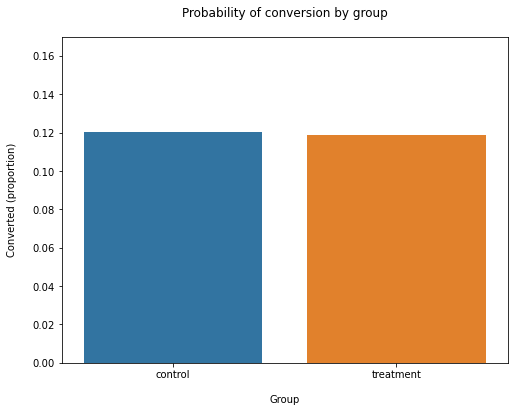

In [23]:
plt.figure(figsize=(8,6))

sns.barplot(x=df2['group'], y=df2['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Probability of conversion by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Both control and treatment groups had an approximately 12 percent chance of conversion.There is roughly 0.0016 or 0.16 % probability where the control group with the old page converts at a higher rate than the treatment group with the new page. This can be visualized from the  barplot above as well. Such close proportion between each group makes it really hard to make a conclusion as to which group leads to more conversions.

I dont think there is sufficient evidence because they are so close. We see there is a 50.01 % probability that a user received the new page. That suggests the probability exist where the same user could aslo be viewing the old page also.





<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ $\le$ $p_{old}$

$H_{1}$ : $p_{new}$ $\gt$ $p_{old}$ 

The null hypothesis is the probability that the old page is better or the same as the new page.

The alternative hypothesis is the probability that the new page is better than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
p_old


0.11959708724499628

Under the null hypothesis, $p_{new}$ and $p_{old}$ both have conversion rates of 0.12.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

There are 145,310 users in the treatment group.

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

There are 145,274 users in the control group.

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(n_new, p_new)


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(n_old, p_old)


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
diff = new_page_converted / n_new - old_page_converted / n_old
diff

0.0010989668556678905

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []

for _ in range(1,10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted / n_new - old_page_converted / n_old
    p_diffs.append(diff)

p_diffs[:5]

[-0.0010963226765328543,
 -0.00016039771213104126,
 -0.002287267913083646,
 -0.0003670950397612477,
 0.00044525526583148733]

In [32]:
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

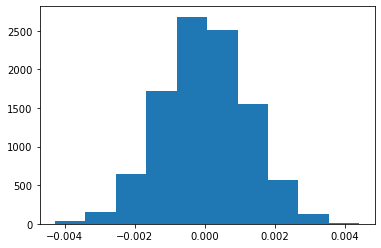

In [33]:
plt.hist(p_diffs);

This is what is expected. There was no difference in convesion rate, it is centered on zero and symetric.

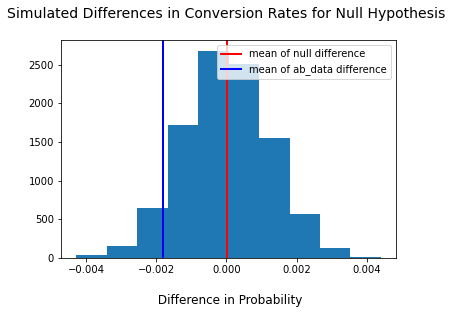

In [34]:
# The parameter is less than some value in the alternative hypothesis

# low is the difference between treatment and control groups in ab_data
low = diff

# low is the difference between treatment and control groups in null hypothesis
high = (np.array(p_diffs).mean())

plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for Null Hypothesis \n", fontsize=14)
plt.xlabel("\n Difference in Probability", fontsize=12)
plt.axvline(x=high, color='r', linewidth=2, label='mean of null difference')
plt.axvline(x=low, color='b', linewidth=2, label='mean of ab_data difference')
plt.legend()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
# calculating  p-value
(act_diff < p_diffs).mean()

0.905990599059906

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Our null hypothesis states that the $p_{old}$ is equal or greater than $p_{new}$. The $p_{new}$ - $p_{old}$ for the simulated values is 0.
This p-value supports the null hypothesis. There is 0.9027 probability our results are random. We retain the null and reject the alternative hypothesis because the high p-value indicates 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]
convert_old

17489

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("z_score: ", z_score, "\np_value: ", p_value)

z_score:  1.3109241984234394 
p_value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

A z-score gives an idea of how far from the mean a data point is. The z-score of 1.31 does not exceed the critical value at 95% confidence level, therefore we cannot reject the null hypothesis.

The p-value helps testing the significance of our hypothesis. The p-value is 0.91 and because we have that large p-value, it means there is very little evidence against the null hypothesis and as such we retain the null hypothesis. So the conversion rate of the old page is greater than or equal to the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The Logistic Regression is suited model for analysis because our rows have categorical responses; conversion or no conversion.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# Using the name 'intercept' to create a new column in the new dataframe 'df'
df2['intercept'] = 1

In [39]:
# create dummy variable with the variable 'group' using get.dummies method.
# which is 1 for treatment and 0 for control.
ab_page = pd.get_dummies(df2['group'])

# .join method to make join dummy columns with df2
df2 = df2.join(ab_page)

# confirm categorical variables from group were added
df2.head()




,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [40]:
df2 = df2.rename(columns = {'treatment': 'ab_page'}, inplace = False)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
import statsmodels.api as sm

logit= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:35:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value is 0.190.  



In Part II, a one tailed test was performed because we wanted to test the null hypothsis which stated that the old page is better than the old page.There was no interest in the alternative hypothesis.This decision is made before to support the null before any data is collected.

In Part III, we used regression to perform a two-tailed test. We test if the new page is greater or lesser than the old page so where the p_new and p_old are not equal to one another. 





f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It has not been proven that the new page is better since the null hypothesis is retained. How long we run the test is a factor to consider. Do we continuously run the test as each observation is observed?

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# Load and Read the CSV File Using Pandas read_csv function
df_countries = pd.read_csv('countries.csv')



In [44]:
# performing inner join at user_id 
new_df = df_countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
# Confirm join
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [45]:
# get the unique values for this column
# result will give the values for dummy variables
new_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
# create dummy variable with the array ['UK', 'US', 'CA'] using get.dummies method.
# 3 dummy columns
new_df[['US', 'CA']] = pd.get_dummies(new_df['country'])[['US', 'CA']]


# confirm categorical variables from group were added
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,0


In [47]:
# print model summary using Logit. 
logit = sm.Logit(new_df['converted'], new_df[['intercept','US','CA']]).fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [48]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:               1.521e-05
Time:                        10:35:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# variables to show interactions between page and country
new_df['US_ab_page'] = new_df['US'] * new_df['ab_page']
new_df['CA_ab_page'] = new_df['CA'] * new_df['ab_page']

# confirm new variables added
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,US,CA,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,0,0,0


In [54]:
lm = sm.OLS(new_df['converted'], new_df[['intercept', 'ab_page', 'US', 'CA', 'US_ab_page', 'CA_ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.197
Time:                        10:56:14   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1200      0.002     70.530      0.000       0.117       0.123
ab_page        0.0011      0.002      0.477      0.634      -0.004       0.006
US             0.0006      0.002      0.307      0.759      -0.003       0.004
CA            -0.0012      0.004     -0.296      0.767      -0.009       0.007
US_ab_page    -0.0033      0.003     -1.180      0.238      -0.009       0.002
CA_ab_page    -0.0080      0.006     -1.360      0.174      -0.020       0.004
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the p-values are large because they are greater than 0.05. That indicates there Is weak evidence against the null. We therefore retain the null hypothesis. The conversion rate of the new page is not significantly bigger than that of the old page. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

# Conclusion

Three different approach explored to see whether a new web page would increase the number of users who decide to pay for the product.

Probability approach

* 12% probability that a user that was in the treatment group converted and the same for the control group. So an almost 50% a user will see the new page
 
A/B test

* It was determined that logistic regression was best for the analysis.
* The  p-value of determined that we cannot reject the null hypothesis.
* a histogram plot of the 10000 values in a numpy array displayed There was no difference in convesion rate, it is centered on zero and symetric.


Regression

* Statsmodels was used to fit the logistic regression to see if there is a significant difference in conversion based on which page a customer receives.
* Because of the large p-values, we conclude there is weak evidence against null. We therefore retain the null hypothesis.



The hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? 

How long do you run to render a decision that neither page is better than another?





# Citations

https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be